In [84]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [85]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

In [86]:
#sc.pp.filter_cells(adata, min_counts=None, min_genes=None, max_counts=None, max_genes=None, inplace=True, copy=False)

In [87]:
adata.n_obs

11843

## Flitering and PCA analysis

In [88]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [89]:
sc.tl.pca(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


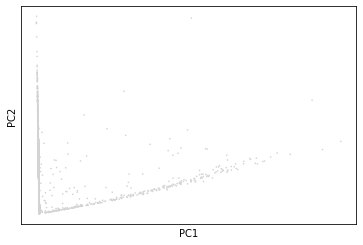

In [90]:
sc.pl.pca(adata)

In [91]:
sc.pp.recipe_zheng17(adata)

In [92]:
sc.tl.pca(adata)

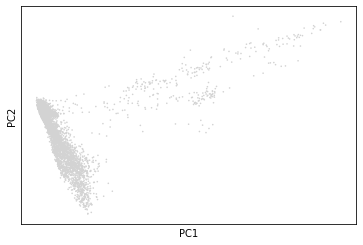

In [93]:
sc.pl.pca(adata)

In [94]:
#conda install -c conda-forge leidenalg

## Clustering and Ploting t-SNE and UMAP

In [95]:
sc.pp.neighbors(adata)

In [96]:
sc.tl.leiden(adata)

In [97]:
sc.tl.umap(adata)

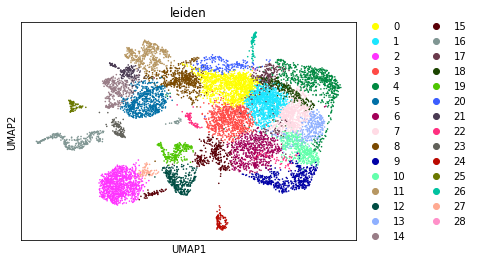

In [98]:
sc.pl.umap(adata,color='leiden')

In [99]:
sc.tl.tsne(adata)

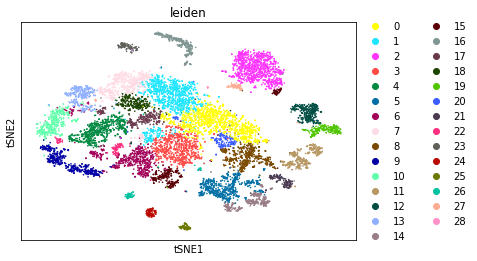

In [100]:
sc.pl.tsne(adata,color='leiden')

## Ranking genes by gene group in the leiden subgroup

In [101]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

/Users/cmdb/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


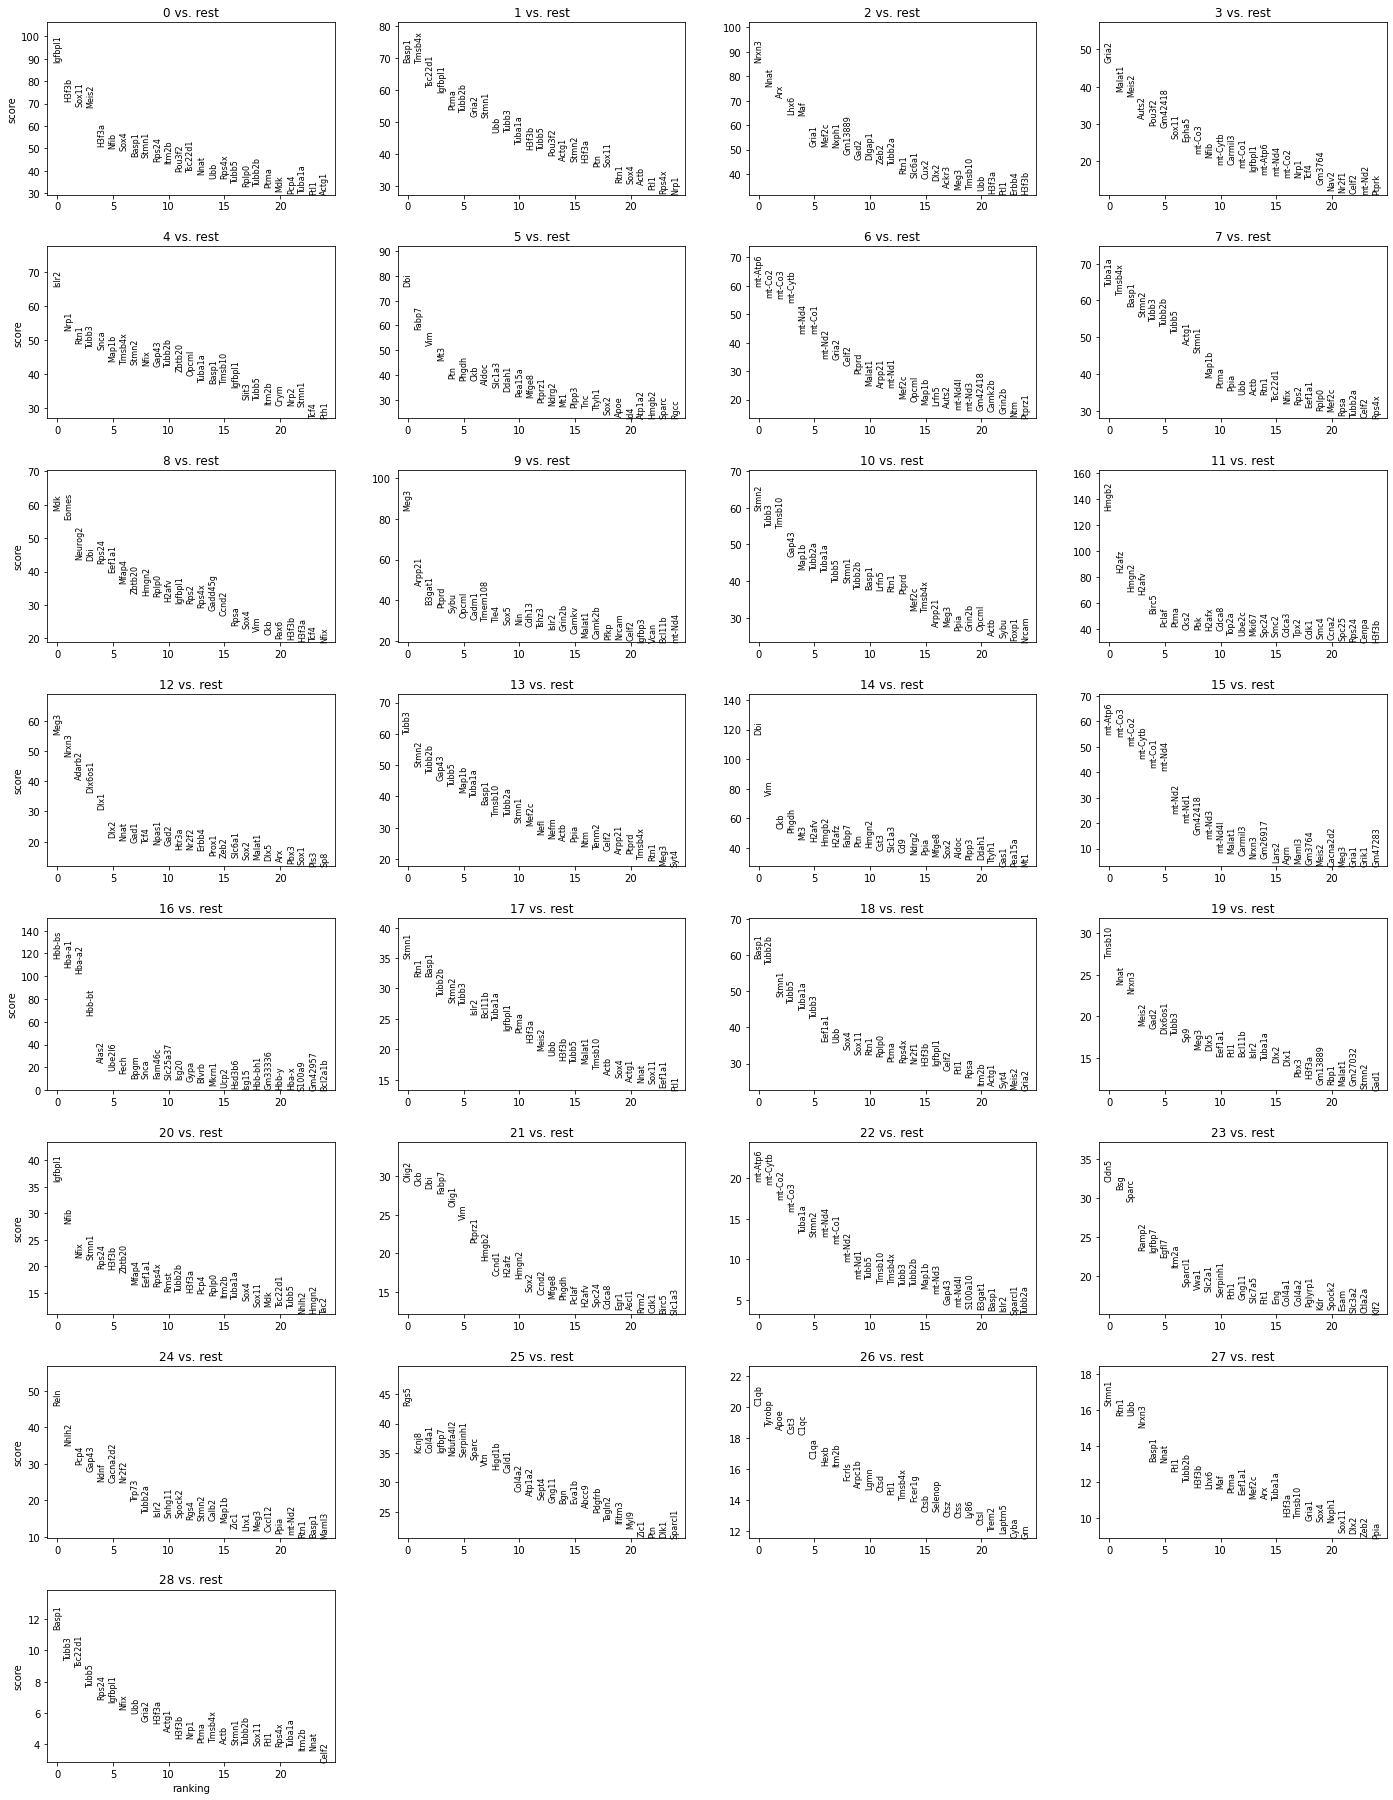

In [102]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [103]:
#sc.tl.rank_genes_groups(adata,'leiden', method='logreg')

In [104]:
import pandas as pd

In [105]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [132]:
df=pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df
##Trying to understand what the strcture of the data looks like and finding the top markers

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Igfbpl1,Basp1,Nrxn3,Gria2,Islr2,Dbi,mt-Atp6,Tuba1a,Mdk,Meg3,...,Tmsb10,Igfbpl1,Olig2,mt-Atp6,Cldn5,Reln,Rgs5,C1qb,Stmn1,Basp1
1,H3f3b,Tmsb4x,Nnat,Malat1,Nrp1,Fabp7,mt-Co2,Tmsb4x,Eomes,Arpp21,...,Nnat,Nfib,Ckb,mt-Cytb,Bsg,Nhlh2,Kcnj8,Tyrobp,Rtn1,Tubb3
2,Sox11,Tsc22d1,Arx,Meis2,Rtn1,Vim,mt-Co3,Basp1,Neurog2,B3gat1,...,Nrxn3,Nfix,Dbi,mt-Co2,Sparc,Pcp4,Col4a1,Apoe,Ubb,Tsc22d1
3,Meis2,Igfbpl1,Lhx6,Auts2,Tubb3,Mt3,mt-Cytb,Stmn2,Dbi,Ptprd,...,Meis2,Stmn1,Fabp7,mt-Co3,Ramp2,Gap43,Igfbp7,Cst3,Nrxn3,Tubb5
4,H3f3a,Ptma,Maf,Pou3f2,Snca,Ptn,mt-Nd4,Tubb3,Rps24,Sybu,...,Gad2,Rps24,Olig1,Tuba1a,Igfbp7,Ndnf,Ndufa4l2,C1qc,Basp1,Rps24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Opcml,Gad2,Islr2,Nxph1,Cux2,Igfbpl1,Gad2,Gad2,Tubb2a,Maf,...,Crym,Gad2,Mef2c,Plpp3,Celf2,Mfap4,Carmil3,Fgfr3,Id1,Gm13889
995,Nrxn3,Sox2,Pou3f2,Arx,Sox2,Nrp1,Rplp0,Sox1,Mef2c,Arx,...,Nrp1,Dlx1,Camk2b,Serpinh1,Rtn1,Sp9,Gm3764,Clu,Tpx2,Arx
996,Lrfn5,Arx,Nfib,Rpsa,Arx,Basp1,Sox2,Arx,Opcml,Gad2,...,Nfix,Sp9,Nrp1,Slc6a1,Arpp21,Lhx6,Eomes,Nefl,Tacc3,AC149090.1
997,Meg3,Meg3,Nfix,Dlx6os1,Ptn,Stmn2,H2afv,Nrxn3,Lrfn5,Zbtb20,...,Tcf4,Nrxn3,Stmn2,Malat1,Opcml,Dlgap1,Meis2,Plpp3,Mki67,Dlgap1


In [117]:
df.iloc[:,9:20]

,9,10,11,12,13,14,15,16,17,18,19
0,Meg3,Stmn2,Hmgb2,Meg3,Tubb3,Dbi,mt-Atp6,Hbb-bs,Stmn1,Basp1,Tmsb10
1,Arpp21,Tubb3,H2afz,Nrxn3,Stmn2,Vim,mt-Co3,Hba-a1,Rtn1,Tubb2b,Nnat
2,B3gat1,Tmsb10,Hmgn2,Adarb2,Tubb2b,Ckb,mt-Co2,Hba-a2,Basp1,Stmn1,Nrxn3
3,Ptprd,Gap43,H2afv,Dlx6os1,Gap43,Phgdh,mt-Cytb,Hbb-bt,Tubb2b,Tubb5,Meis2
4,Sybu,Map1b,Birc5,Dlx1,Tubb5,Mt3,mt-Co1,Alas2,Stmn2,Tuba1a,Gad2
...,...,...,...,...,...,...,...,...,...,...,...
994,Maf,Gm13889,Lhx6,Ptn,Fabp7,Nrp1,H3f3a,Gm3764,Birc5,Dlx1,Crym
995,Arx,Fabp7,Lrfn5,Pou3f2,Pax6,Syt4,Ppia,Malat1,Lhx6,Dlx6os1,Nrp1
996,Gad2,Sox1,Tubb2a,Mfge8,Sox2,Arpp21,Rps4x,mt-Nd3,Arx,Arx,Nfix
997,Zbtb20,Sox2,Opcml,Neurog2,Arx,Stmn2,Fth1,Cst3,Sox2,Dlx2,Tcf4


In [107]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
##Top markers by thier P-values

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,24_n,24_p,25_n,25_p,26_n,26_p,27_n,27_p,28_n,28_p
0,Igfbpl1,0.000000e+00,Basp1,0.000000e+00,Nrxn3,0.0,Gria2,6.866586e-247,Islr2,0.000000e+00,...,Reln,2.598747e-73,Rgs5,1.559827e-59,C1qb,3.383463e-33,Stmn1,1.291530e-28,Basp1,0.000007
1,H3f3b,0.000000e+00,Tmsb4x,0.000000e+00,Nnat,0.0,Malat1,7.776605e-221,Nrp1,2.478740e-261,...,Nhlh2,2.520778e-61,Kcnj8,2.067076e-52,Tyrobp,3.218446e-31,Rtn1,1.890992e-26,Tubb3,0.000026
2,Sox11,0.000000e+00,Tsc22d1,0.000000e+00,Arx,0.0,Meis2,7.545922e-188,Rtn1,1.842387e-311,...,Pcp4,7.899497e-55,Col4a1,1.848873e-52,Apoe,6.395787e-31,Ubb,2.390579e-27,Tsc22d1,0.000043
3,Meis2,0.000000e+00,Igfbpl1,0.000000e+00,Lhx6,0.0,Auts2,1.326658e-147,Tubb3,7.754389e-309,...,Gap43,4.559795e-52,Igfbp7,1.898616e-52,Cst3,1.215769e-30,Nrxn3,2.516762e-24,Tubb5,0.000104
4,H3f3a,0.000000e+00,Ptma,0.000000e+00,Maf,0.0,Pou3f2,8.401348e-132,Snca,1.277363e-217,...,Ndnf,2.501154e-47,Ndufa4l2,5.557737e-52,C1qc,1.823162e-30,Basp1,5.811906e-22,Rps24,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Opcml,6.424936e-266,Gad2,1.966269e-304,Islr2,0.0,Nxph1,3.586755e-181,Cux2,3.991509e-215,...,Mfap4,2.813432e-113,Carmil3,6.763546e-70,Fgfr3,3.808625e-140,Id1,1.693336e-136,Gm13889,0.000000
995,Nrxn3,9.727818e-310,Sox2,1.495731e-299,Pou3f2,0.0,Arx,2.370525e-171,Sox2,2.691998e-284,...,Sp9,1.871289e-204,Gm3764,3.759983e-61,Clu,7.636504e-177,Tpx2,9.089383e-186,Arx,0.000000
996,Lrfn5,0.000000e+00,Arx,0.000000e+00,Nfib,0.0,Rpsa,5.070296e-148,Arx,0.000000e+00,...,Lhx6,1.015006e-220,Eomes,0.000000e+00,Nefl,6.535099e-179,Tacc3,4.048949e-189,AC149090.1,0.000000
997,Meg3,0.000000e+00,Meg3,0.000000e+00,Nfix,0.0,Dlx6os1,5.280927e-251,Ptn,1.825553e-245,...,Dlgap1,1.493135e-97,Meis2,1.038947e-64,Plpp3,6.975057e-101,Mki67,2.286324e-212,Dlgap1,0.000000


/Users/cmdb/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


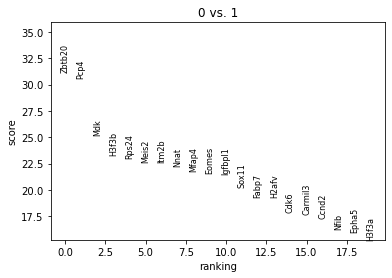

In [52]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='t-test')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

## Identifying cell markers and cell types 

In [64]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'umap', 'rank_genes_groups', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [133]:
marker_genes = ['Igfbpl1','Basp1','Nrxn3','Gria2','Islr2','Dbi','mt-Atp6','Tuba1a','Mdk','Meg3','Stmn2','Hmgb2','Meg3','Tubb3','Dbi','mt-Atp6','Hbb-bs','Stmn1','Basp1','Tmsb10','Igfbpl1','Olig2','mt-Atp6','Cldn5','Reln','Rgs5','C1qb','Stmn1','Basp1']
marker_genes

['Igfbpl1',
 'Basp1',
 'Nrxn3',
 'Gria2',
 'Islr2',
 'Dbi',
 'mt-Atp6',
 'Tuba1a',
 'Mdk',
 'Meg3',
 'Stmn2',
 'Hmgb2',
 'Meg3',
 'Tubb3',
 'Dbi',
 'mt-Atp6',
 'Hbb-bs',
 'Stmn1',
 'Basp1',
 'Tmsb10',
 'Igfbpl1',
 'Olig2',
 'mt-Atp6',
 'Cldn5',
 'Reln',
 'Rgs5',
 'C1qb',
 'Stmn1',
 'Basp1']

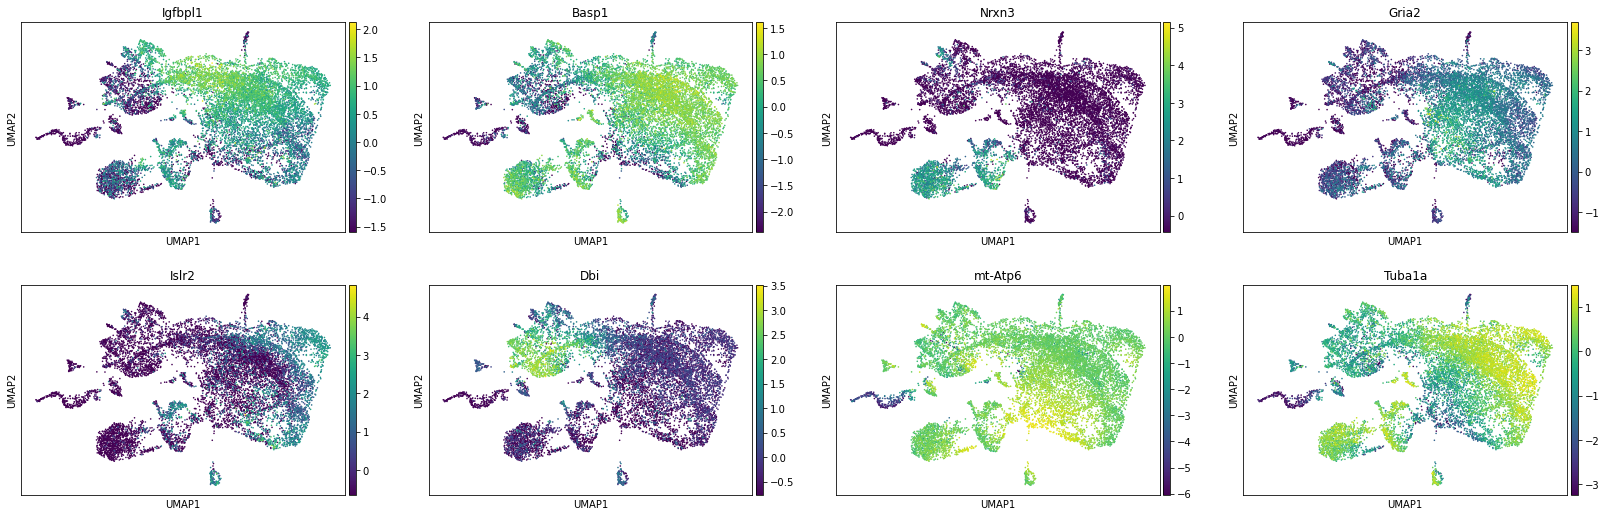

In [134]:
##Plot the umap by the first 8 genes 
sc.pl.umap(adata, color=['Igfbpl1','Basp1','Nrxn3','Gria2','Islr2','Dbi','mt-Atp6','Tuba1a',])

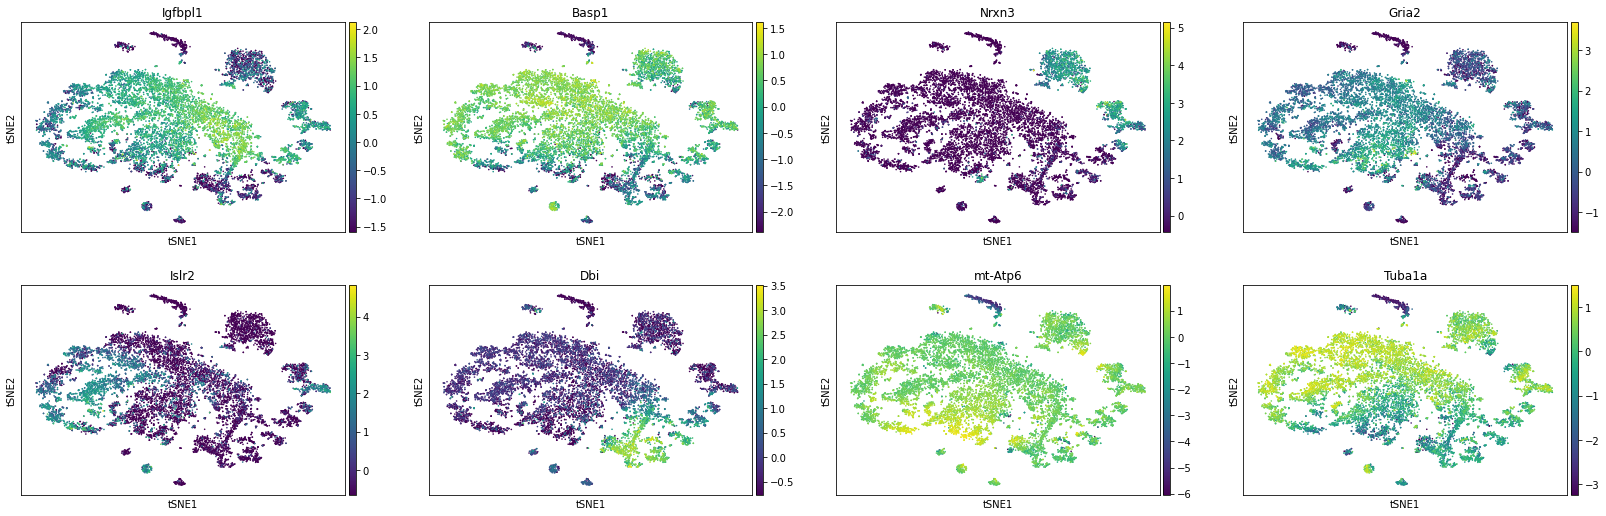

In [123]:
sc.pl.tsne(adata, color=['Igfbpl1','Basp1','Nrxn3','Gria2','Islr2','Dbi','mt-Atp6','Tuba1a',])

## Supporting Graphs gene markers

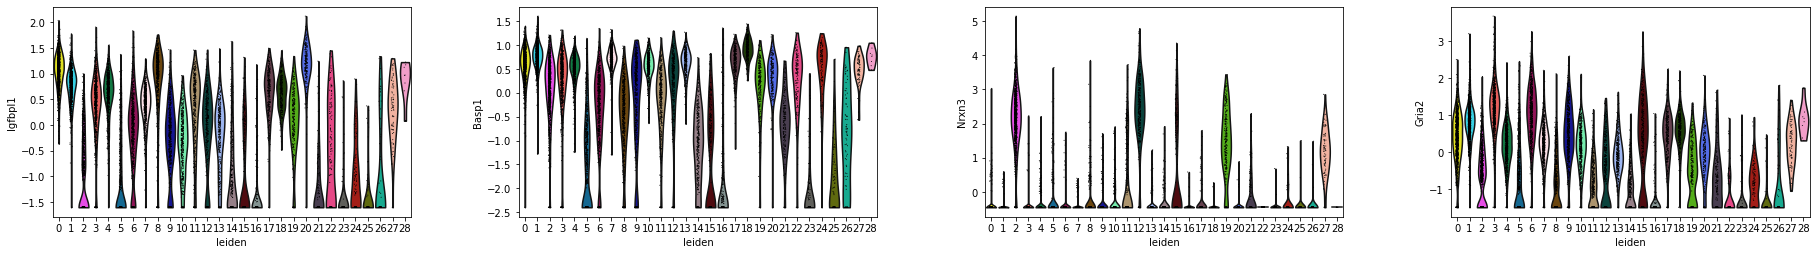

In [126]:
sc.pl.violin(adata, ['Igfbpl1','Basp1','Nrxn3','Gria2'], groupby='leiden')

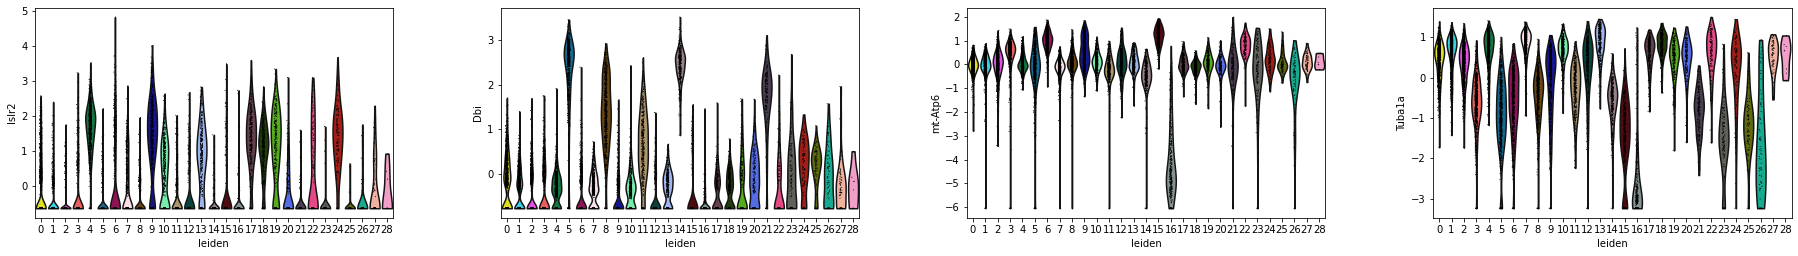

In [128]:
sc.pl.violin(adata, ['Islr2','Dbi','mt-Atp6','Tuba1a'], groupby='leiden')

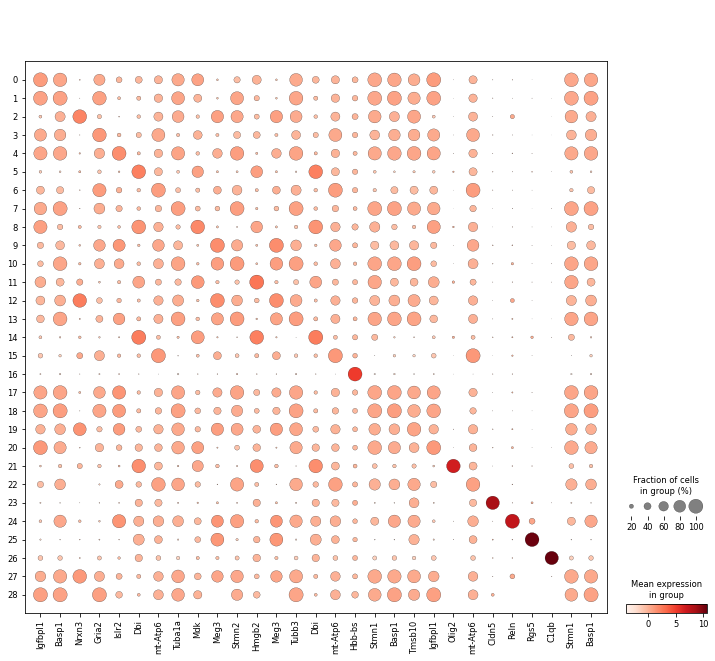

In [131]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')